# Метод анализа иерархий и визуализация

Коэффициент согласованности - coherence

In [11]:
import numpy as np
def coherence(arr, w):
    #calculate maximum eigenvalue of matrix
    n = arr[0].size
    p = arr @ w
    p /= w
    lam = p.sum()
    lam /= n
    #calculate concordance factor
    ci = (lam - n) / (n - 1)
    #calculate random index
    ri = 1.98 * (n - 2) / n
    #calculate coherence
    cr = ci / ri
    return cr

Метод анализа иерархий

In [12]:
def MAI(arr):
    n = arr[0].size
    #normalize the matrix
    for i in range(n):
        s = 0
        for j in range(n):
            s += arr[j][i]
        for j in range(n):
            arr[j][i] /= s
    #calculate the relative weights of indicators
    res = np.arange(n, dtype=float)
    for i in range(n):
        res[i] = arr[i].sum() / n
    #check if matrix coherence is satisfying
    if coherence(arr, res) > 0.1:
        return [-1]
    return res

Результат работы МАИ

In [13]:
if __name__ == '__main__':
    #initialize data
    a = np.array([[1, 2, 1/3, 1/5, 1/7], [1/2, 1, 1/6, 1/9, 1/9], [3, 6, 1, 1/2, 1/2], [5, 9, 2, 1, 1/2], [7, 9, 2, 2, 1]])
    #print initial data
    print(a)
    #print resulting data
    print(MAI(a))

[[1.         2.         0.33333333 0.2        0.14285714]
 [0.5        1.         0.16666667 0.11111111 0.11111111]
 [3.         6.         1.         0.5        0.5       ]
 [5.         9.         2.         1.         0.5       ]
 [7.         9.         2.         2.         1.        ]]
[0.06222892 0.03521868 0.18777698 0.29684433 0.41793109]


Создание диаграммы

In [14]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

dpi = 80

def normalize(df):
    result = df.copy()
    for feature_name in df.columns[1:]:
        # Mean
        mean = df[feature_name].mean()
        # Count of values
        n = len(df[feature_name])
        # Sample standart deviation
        ssd = np.sqrt((1 / (n - 1)) * np.power(df[feature_name] - mean, 2).sum())

        result[feature_name] = (df[feature_name] - mean) / ssd
    return result

def show(input_filename, weights):

    df = pd.read_csv(input_filename)

    # Normalize
    #print(df[df.columns[1:]])
    df = normalize(df)
    #print(df[df.columns[1:]])

    # data processing
    df['Total score'] = (df[df.columns[1:]] * weights).sum(axis=1)
    #print(df['Total score'])
    # sort values by total score
    df.sort_values(by='Total score', ascending=True, inplace=True)

    # Set font size
    mpl.rcParams.update({'font.size': 9})
    # Create figure
    _, ax = plt.subplots(dpi = dpi, figsize = (512 / dpi, 384 / dpi), num = 'Test')
    # Drawing vertical lines for x axis
    ax.xaxis.grid(True, zorder = 1)
    ax.set_title('Test')
    # The y coordinates of the bars
    xs = range(len(df['Total score'].values))

    # Create a horizontal bar plots
    plt.barh(xs, df['Total score'].values,
            height = 0.2, color = 'blue', alpha = 0.7, label = 'KPI',
            zorder = 2)

    # Draw names of objects
    plt.yticks(xs, df[df.columns[0]].values, rotation = 10)

    # Set legend location
    plt.legend(loc='upper right')
    plt.savefig('result.png')
    plt.show()

#if __name__ == '__main__':
    #show('movehubcostofliving.csv', [0.1, 0.1, 0.1, 0.2, 0.2, 0.4])
    #show('test.csv', [0.1, 0.1, 0.1, 0.2, 0.2, 0.4])

Визуализация

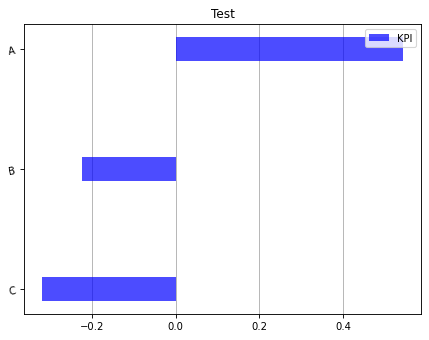

In [15]:
#show('movehubcostofliving.csv', [0.1, 0.1, 0.1, 0.2, 0.2, 0.4])
show('test.csv', [0.1, 0.1, 0.1, 0.2, 0.2, 0.4])